In [1]:
import pandas as pd
import numpy 
import re 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding ="ISO-8859-1")
star_wars.describe(include="all")

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
count,1.186000e+03,1187,837,674,572,551,608,759,739,836,...,827,829,829,214,1069,1047,1047,859,1037,1044
unique,NaN,3,3,1,1,1,1,1,1,7,...,7,4,3,3,3,3,5,6,6,10
top,NaN,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,No,No,Female,45-60,"$50,000 - $99,999",Some college or Associate degree,East North Central
freq,NaN,936,552,674,572,551,608,759,739,237,...,605,325,615,114,641,549,291,298,328,181
mean,3.290128e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.055639e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.288373e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.289451e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.290147e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.290814e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]

In [4]:
yes_no = {
    "Yes": True,
    "No": False
}

star_wars.iloc[:,1] = star_wars.iloc[:,1].map(yes_no)
star_wars.iloc[:,2] = star_wars.iloc[:,2].map(yes_no)

In [5]:
star_wars.describe(include="all")


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
count,1.186000e+03,1186,836,673,571,550,607,758,738,835,...,826,828,828,213,1068,1046,1046,858,1036,1043
unique,NaN,2,2,1,1,1,1,1,1,6,...,6,3,2,2,2,2,4,5,5,9
top,NaN,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,No,No,Female,45-60,"$50,000 - $99,999",Some college or Associate degree,East North Central
freq,NaN,936,552,673,571,550,607,758,738,237,...,605,325,615,114,641,549,291,298,328,181
mean,3.290128e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.055639e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.288373e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.289451e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.290147e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.290814e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
star_wars.iloc[:,3:9] =  pd.notnull(star_wars.iloc[:,3:9]) 






In [7]:

for i in range(3,9):
    x = i-2
    star_wars = star_wars.rename(columns={star_wars.columns[i]: "seen_{0}".format(x),})
   
  
    

In [8]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [9]:
x = 1 
for c in star_wars.columns[9:15]:
    
    star_wars = star_wars.rename(columns={c:"ranking_{0}".format(x)})
    x +=1

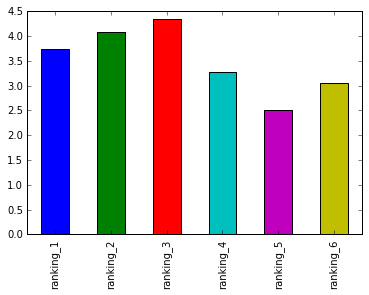

In [10]:
means = star_wars.iloc[:,9:15].mean()
means.plot.bar()


The first three movies had the best ranking as expected and Empire Strikes Back does have the best ranking. 

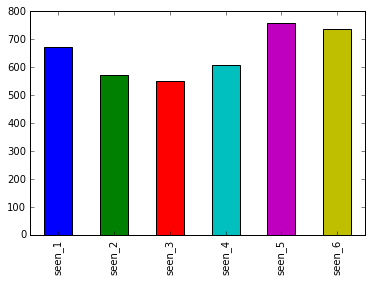

In [11]:
sums = star_wars.loc[:,"seen_1":"seen_6"].sum()
sums.plot.bar()

In [12]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

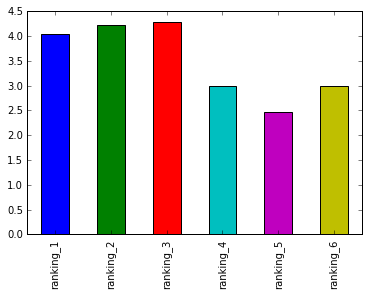

In [13]:
male_mean = males.iloc[:,9:15].mean()
male_sum = males.loc[:,"seen_1":"seen_6"].sum()
female_mean = females.iloc[:,9:15].mean()
female_sum = females.loc[:,"seen_1":"seen_6"].sum()

male_mean.plot.bar()







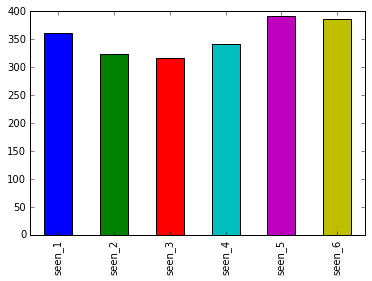

In [14]:
male_sum.plot.bar()

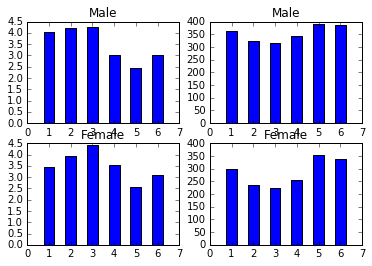

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
bar_positions = numpy.arange(6) + 0.75
ax1.bar(bar_positions, male_mean.values, 0.5)
ax1.set_title('Male')
ax2.bar(bar_positions, male_sum.values, 0.5)
ax2.set_title('Male')
ax3.bar(bar_positions, female_mean.values, 0.5)
ax3.set_title('Female')
ax4.bar(bar_positions, female_sum.values, 0.5)
ax4.set_title('Female')
